In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
df_10 = pd.read_csv('./dataset/listingsOctober.csv', encoding='Latin-1')

/Users/Kenny/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_11 = pd.read_csv('./dataset/listingsNovember.csv', encoding='Latin-1')

/Users/Kenny/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_12 = pd.read_csv('./dataset/listingsDecember.csv', encoding='Latin-1')

/Users/Kenny/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (61,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df = pd.concat([df_10, df_11, df_12], ignore_index=True)

In [6]:
df.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2515,https://www.airbnb.com/rooms/2515,20181003014905,2018-10-03,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,1.42
1,2539,https://www.airbnb.com/rooms/2539,20181003014905,2018-10-03,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,NaN,NaN,f,f,moderate,f,f,8,0.23
2,2595,https://www.airbnb.com/rooms/2595,20181003014905,2018-10-03,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ftÂ²), immaculate and nicely f...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,0.33
3,3330,https://www.airbnb.com/rooms/3330,20181003014905,2018-10-03,++ Brooklyn Penthouse Guestroom ++,"This is a spacious, clean, furnished master be...","Room Features: - clean, hardwood floors - 2 la...","This is a spacious, clean, furnished master be...",none,Location is GREAT!! Right off the L train in t...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,0.32
4,3647,https://www.airbnb.com/rooms/3647,20181003014905,2018-10-03,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,NaN
5,3831,https://www.airbnb.com/rooms/3831,20181003014905,2018-10-03,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,NaN,NaN,f,f,moderate,f,f,1,4.36
6,5022,https://www.airbnb.com/rooms/5022,20181003014905,2018-10-03,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0.09
7,5099,https://www.airbnb.com/rooms/5099,20181003014905,2018-10-03,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment is true New York ...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment is true New York ...,none,My neighborhood in Midtown East is called Murr...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0.57
8,5121,https://www.airbnb.com/rooms/5121,20181003014905,2018-10-03,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.45
9,5172,https://www.airbnb.com/rooms/5172,20181003014905,2018-10-03,Quiet Slice of Manhattan,"Quiet, very small one bedroom apartment in Mur...",The bedroom is roomy at 10'x12' and has a quee...,"Quiet, very small one bedroom apartment in Mur...",none,The welcome packet has maps and such. Althoug...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,t,1,0.71


In [7]:
df.last_scraped.value_counts()

2018-10-03    50039
2018-12-06    49056
2018-11-04    31385
2018-11-03    19583
2018-10-05        2
Name: last_scraped, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150065 entries, 0 to 150064
Data columns (total 96 columns):
id                                  150065 non-null int64
listing_url                         150065 non-null object
scrape_id                           150065 non-null int64
last_scraped                        150065 non-null object
name                                150004 non-null object
summary                             144363 non-null object
space                               103704 non-null object
description                         148632 non-null object
experiences_offered                 150065 non-null object
neighborhood_overview               89967 non-null object
notes                               60242 non-null object
transit                             93593 non-null object
access                              86839 non-null object
interaction                         83901 non-null object
house_rules                         89897 non-null object
thumbnail_ur

## Cleaning

In [9]:
# drop columns
df.drop(['scrape_id', 'last_scraped', 'experiences_offered', 'host_response_rate', 'host_acceptance_rate', 
        'weekly_price', 'monthly_price','requires_license', 'license', 'jurisdiction_names', 'is_business_travel_ready'], axis=1)

,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2515,https://www.airbnb.com/rooms/2515,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,NaN,Please no cooking at night but you can warm up...,Subway 2.3.B.C. at 110th street around the cor...,Guests will have their PRIVATE BATHROOM (NOTE:...,...,10.0,9.0,9.0,9.0,f,strict_14_with_grace_period,f,f,3,1.42
1,2539,https://www.airbnb.com/rooms/2539,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,Close to Prospect Park and Historic Ditmas Park,If this room is unavailable on your desired da...,Very close to F and G trains and Express bus i...,NaN,...,10.0,10.0,10.0,10.0,f,moderate,f,f,8,0.23
2,2595,https://www.airbnb.com/rooms/2595,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ftÂ²), immaculate and nicely f...","Find your romantic getaway to this beautiful, ...",Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"Guests have full access to the kitchen, bathro...",...,9.0,10.0,10.0,9.0,f,strict_14_with_grace_period,t,t,2,0.33
3,3330,https://www.airbnb.com/rooms/3330,++ Brooklyn Penthouse Guestroom ++,"This is a spacious, clean, furnished master be...","Room Features: - clean, hardwood floors - 2 la...","This is a spacious, clean, furnished master be...",Location is GREAT!! Right off the L train in t...,We would very much appreciate it if you give u...,You will be STEPS AWAY FROM THE L TRAIN. Hop o...,The apartment is equipped with full kitchen (m...,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,f,f,3,0.32
4,3647,https://www.airbnb.com/rooms/3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,t,t,1,NaN
5,3831,https://www.airbnb.com/rooms/3831,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Just the right mix of urban center and local n...,"My husband, Tivon, is NYC-licensed For-Hire-Ve...",B52 bus for a 10-minute ride to downtown Brook...,You will have exclusive use of and access to: ...,...,10.0,10.0,9.0,9.0,f,moderate,f,f,1,4.36
6,5022,https://www.airbnb.com/rooms/5022,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,NaN,NaN,NaN,NaN,...,10.0,10.0,9.0,10.0,f,strict_14_with_grace_period,t,t,1,0.09
7,5099,https://www.airbnb.com/rooms/5099,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment is true New York ...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment is true New York ...,My neighborhood in Midtown East is called Murr...,Read My Full Listing For All Information. New ...,From the apartment is a 10 minute walk to Gran...,I will meet you upon arrival.,...,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,t,t,1,0.57
8,5121,https://www.airbnb.com/rooms/5121,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,NaN,NaN,NaN,NaN,...,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,f,f,1,0.45
9,5172,https://www.airbnb.com/rooms/5172,Quiet Slice of Manhattan,"Quiet, very small one bedroom apartment in Mur...",The bedroom is roomy at 10'x12' and has a q

In [10]:
# drop $ and , 
df['price'] = df['price'].astype(str).str.replace('$', '')
df['price'] = df['price'].astype(str).str.replace(',', '')
df['price'] = df['price'].str.strip()
df['price'] = df['price'].astype(float)
df['price']

0          59.0
1         149.0
2         225.0
3          70.0
4         150.0
5          89.0
6          80.0
7         185.0
8          60.0
9         129.0
10         79.0
11         79.0
12        126.0
13        120.0
14        135.0
15        145.0
16         88.0
17         85.0
18        175.0
19        140.0
20         75.0
21         65.0
22        150.0
23        215.0
24        144.0
25        140.0
26         99.0
27        299.0
28        120.0
29        130.0
          ...  
150035     45.0
150036    115.0
150037     85.0
150038    125.0
150039     36.0
150040    250.0
150041     69.0
150042    195.0
150043    100.0
150044    250.0
150045     65.0
150046    118.0
150047     99.0
150048    205.0
150049     70.0
150050     35.0
150051     35.0
150052    115.0
150053    150.0
150054    138.0
150055     58.0
150056    200.0
150057    178.0
150058    120.0
150059    288.0
150060     60.0
150061     65.0
150062    135.0
150063    350.0
150064     60.0
Name: price, Length: 150

In [11]:
# drop $ and , 
df['cleaning_fee'] = df['cleaning_fee'].astype(str).str.replace('$', '')
df['cleaning_fee'] = df['cleaning_fee'].astype(str).str.replace(',', '')
df['cleaning_fee'] = df['cleaning_fee'].str.strip()
df['cleaning_fee'] = df['cleaning_fee'].astype(float)
df['cleaning_fee']

0          60.0
1          25.0
2         100.0
3         125.0
4          75.0
5           NaN
6          80.0
7         125.0
8           NaN
9          90.0
10         15.0
11          NaN
12         50.0
13         40.0
14         60.0
15         60.0
16         64.0
17         80.0
18        100.0
19         90.0
20          NaN
21         30.0
22         50.0
23          NaN
24         90.0
25          0.0
26         50.0
27        100.0
28         50.0
29         10.0
          ...  
150035     75.0
150036      NaN
150037     50.0
150038      NaN
150039      NaN
150040      NaN
150041     29.0
150042    150.0
150043      NaN
150044      NaN
150045      NaN
150046     40.0
150047      NaN
150048    100.0
150049      NaN
150050      NaN
150051      NaN
150052      NaN
150053     70.0
150054    150.0
150055      NaN
150056    100.0
150057    150.0
150058      NaN
150059    150.0
150060      NaN
150061     20.0
150062     60.0
150063      NaN
150064      NaN
Name: cleaning_fee, Leng

In [12]:
# dates
df['host_since_year'] = pd.DatetimeIndex(df['host_since']).year
df['host_since_year'].dropna()

0         2008.0
1         2008.0
2         2008.0
3         2008.0
4         2008.0
5         2008.0
6         2009.0
7         2009.0
8         2009.0
9         2009.0
10        2009.0
11        2009.0
12        2009.0
13        2009.0
14        2009.0
15        2009.0
16        2009.0
17        2009.0
18        2009.0
19        2009.0
20        2009.0
21        2009.0
22        2009.0
23        2009.0
24        2009.0
25        2009.0
26        2009.0
27        2009.0
28        2009.0
29        2009.0
           ...  
150035    2018.0
150036    2016.0
150037    2016.0
150038    2018.0
150039    2013.0
150040    2011.0
150041    2017.0
150042    2018.0
150043    2018.0
150044    2015.0
150045    2018.0
150046    2013.0
150047    2015.0
150048    2014.0
150049    2015.0
150050    2016.0
150051    2016.0
150052    2014.0
150053    2014.0
150054    2013.0
150055    2016.0
150056    2018.0
150057    2013.0
150058    2013.0
150059    2013.0
150060    2016.0
150061    2018.0
150062    2018

In [13]:
#host_r_time = {'N/A': 0, 'within a day': 1, 'within a few hours': 2,'within an hour':3}
#df['host_response_time'] = [host_r_time[item] for item in df['host_response_time']]
#df['host_response_time'].fillna(0)
#print(df['host_response_time'])

In [14]:
# convert host_response_time string to an int rating of 0-4
df['host_response_time'].fillna(0, inplace=True)
df.host_response_time[df.host_response_time == 'N/A'] = 0
df.host_response_time[df.host_response_time == 'within an hour'] = 1
df.host_response_time[df.host_response_time == 'within a few hours'] = 2
df.host_response_time[df.host_response_time == 'within a day'] = 3
df.host_response_time[df.host_response_time == 'a few days or more'] = 4
df.host_response_time

/Users/Kenny/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Kenny/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/Kenny/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """

0         0
1         0
2         3
3         0
4         3
5         1
6         3
7         3
8         0
9         0
10        3
11        0
12        0
13        3
14        0
15        1
16        0
17        2
18        0
19        2
20        1
21        4
22        2
23        1
24        0
25        1
26        1
27        0
28        0
29        0
         ..
150035    0
150036    1
150037    1
150038    0
150039    1
150040    0
150041    0
150042    0
150043    1
150044    0
150045    0
150046    0
150047    0
150048    0
150049    0
150050    1
150051    1
150052    0
150053    0
150054    0
150055    0
150056    0
150057    0
150058    0
150059    0
150060    0
150061    1
150062    1
150063    0
150064    0
Name: host_response_time, Length: 150065, dtype: object

In [15]:
# drop % && convert to float
df['host_response_rate'].fillna(0, inplace=True)
df['host_response_rate'] = df['host_response_rate'].astype(str).str.replace('%', '')
df['host_response_rate'] = df['host_response_rate'].astype(str).str.replace(',', '')
df['host_response_rate'] = df['host_response_rate'].str.strip()
df['host_response_rate'] = df['host_response_rate'].astype(float)
df['host_response_rate']

0           0.0
1           0.0
2          80.0
3           0.0
4          50.0
5         100.0
6         100.0
7         100.0
8           0.0
9           0.0
10         91.0
11          0.0
12          0.0
13         90.0
14          0.0
15        100.0
16          0.0
17         79.0
18          0.0
19        100.0
20        100.0
21         13.0
22        100.0
23        100.0
24          0.0
25        100.0
26        100.0
27          0.0
28          0.0
29          0.0
          ...  
150035      0.0
150036    100.0
150037    100.0
150038      0.0
150039    100.0
150040      0.0
150041      0.0
150042      0.0
150043    100.0
150044      0.0
150045      0.0
150046      0.0
150047      0.0
150048      0.0
150049      0.0
150050    100.0
150051    100.0
150052      0.0
150053      0.0
150054      0.0
150055      0.0
150056      0.0
150057      0.0
150058      0.0
150059      0.0
150060      0.0
150061     88.0
150062    100.0
150063      0.0
150064      0.0
Name: host_response_rate

In [16]:
# host_is_superhost
df.host_is_superhost[df.host_is_superhost == 't'] = 1
df.host_is_superhost[df.host_is_superhost == 'f'] = 0
df.host_is_superhost.astype(float)
df.host_is_superhost

/Users/Kenny/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Kenny/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0         0
1         1
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         1
10        0
11        0
12        0
13        1
14        0
15        1
16        0
17        0
18        1
19        0
20        1
21        0
22        0
23        1
24        0
25        1
26        0
27        0
28        0
29        0
         ..
150035    0
150036    0
150037    0
150038    0
150039    0
150040    0
150041    0
150042    0
150043    0
150044    0
150045    0
150046    0
150047    0
150048    0
150049    0
150050    0
150051    0
150052    0
150053    0
150054    0
150055    0
150056    0
150057    0
150058    0
150059    0
150060    0
150061    0
150062    0
150063    0
150064    0
Name: host_is_superhost, Length: 150065, dtype: object

In [17]:
# host_identity_verified
df.host_identity_verified[df.host_identity_verified == 't'] = 1
df.host_identity_verified[df.host_identity_verified == 'f'] = 0
df.host_identity_verified.astype(float)
df.host_identity_verified 

/Users/Kenny/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Kenny/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         0
8         0
9         1
10        0
11        1
12        1
13        1
14        1
15        0
16        1
17        0
18        1
19        0
20        1
21        1
22        1
23        1
24        1
25        1
26        0
27        1
28        0
29        1
         ..
150035    0
150036    0
150037    0
150038    0
150039    1
150040    0
150041    0
150042    0
150043    0
150044    0
150045    0
150046    1
150047    1
150048    1
150049    1
150050    0
150051    0
150052    1
150053    1
150054    0
150055    0
150056    0
150057    0
150058    1
150059    0
150060    0
150061    0
150062    0
150063    0
150064    0
Name: host_identity_verified, Length: 150065, dtype: object

In [18]:
threshold=10
df['count'] = df.groupby('property_type')['property_type'].transform(pd.Series.value_counts)
df=df[df['count']>=threshold]
df.drop(['count'], axis = 1, inplace = True)

In [19]:
df['property_type'].value_counts()

Apartment             120705
House                  10995
Townhouse               4876
Loft                    4606
Condominium             3888
Serviced apartment      2021
Guest suite              743
Other                    454
Bed and breakfast        337
Boutique hotel           302
Resort                   293
Guesthouse               174
Hostel                   169
Hotel                    155
Bungalow                  88
Villa                     73
Tiny house                44
Aparthotel                31
Boat                      30
Cottage                   14
Tent                      12
Camper/RV                 12
Cabin                     10
Name: property_type, dtype: int64

In [20]:
# potential columns to clean: host_verification, is_location_exact,

## Analysis

In [21]:
neighbourhood_cleansed = df['neighbourhood_cleansed'].value_counts()
neighbourhood_cleansed

Williamsburg                  12497
Bedford-Stuyvesant            10743
Harlem                         8382
Bushwick                       7388
Upper West Side                6440
Hell's Kitchen                 6313
East Village                   6055
Upper East Side                5836
Midtown                        5095
Crown Heights                  4830
East Harlem                    3523
Chelsea                        3504
Greenpoint                     3482
Lower East Side                2917
Astoria                        2764
Washington Heights             2693
West Village                   2482
Flatbush                       1920
Financial District             1839
Clinton Hill                   1799
Prospect-Lefferts Gardens      1700
Park Slope                     1597
Long Island City               1583
Kips Bay                       1515
Murray Hill                    1500
Fort Greene                    1370
Flushing                       1269
Greenwich Village           

In [22]:
accommodates = df['accommodates'].value_counts()
accommodates

2     67481
1     23038
4     22643
3     17288
6      7366
5      6238
8      2168
7      1510
10      830
9       397
16      396
12      351
11      122
14      106
15       58
13       40
Name: accommodates, dtype: int64

In [23]:
# convert column to string
df['price'] = df['price'].astype(str).str.replace('$', '')
df['price'] = df['price'].astype(str).str.replace(',', '')
df['price'] = df['price'].str.strip()
df['price'] = df['price'].astype(float)
df['price']

0          59.0
1         149.0
2         225.0
3          70.0
4         150.0
5          89.0
6          80.0
7         185.0
8          60.0
9         129.0
10         79.0
11         79.0
12        126.0
13        120.0
14        135.0
15        145.0
16         88.0
17         85.0
18        175.0
19        140.0
20         75.0
21         65.0
22        150.0
23        215.0
24        144.0
25        140.0
26         99.0
27        299.0
28        120.0
29        130.0
          ...  
150035     45.0
150036    115.0
150037     85.0
150038    125.0
150039     36.0
150040    250.0
150041     69.0
150042    195.0
150043    100.0
150044    250.0
150045     65.0
150046    118.0
150047     99.0
150048    205.0
150049     70.0
150050     35.0
150051     35.0
150052    115.0
150053    150.0
150054    138.0
150055     58.0
150056    200.0
150057    178.0
150058    120.0
150059    288.0
150060     60.0
150061     65.0
150062    135.0
150063    350.0
150064     60.0
Name: price, Length: 150

In [24]:
df.sort_values(['neighbourhood_cleansed', 'accommodates'], ascending=[True, False])

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_since_year
39337,23139647,https://www.airbnb.com/rooms/23139647,20181003014905,2018-10-03,Comfy home for NYC groups near Botanical Garden,Private rental of 2 levels of a private house ...,"***** Please provide the purpose of your trip,...",Private rental of 2 levels of a private house ...,none,"It's a quiet, safe tree-lined neighborhood (Gr...",...,NaN,NaN,f,f,strict_14_with_grace_period,f,f,5,0.84,2014.0
88792,23139647,https://www.airbnb.com/rooms/23139647,20181103152857,2018-11-04,Comfy home for NYC groups near Botanical Garden,Private rental of 2 levels of a private house ...,"***** Please provide the purpose of your trip,...",Private rental of 2 levels of a private house ...,none,"It's a quiet, safe tree-lined neighborhood (Gr...",...,NaN,NaN,f,f,strict_14_with_grace_period,f,f,5,1.00,2014.0
136427,23139647,https://www.airbnb.com/rooms/23139647,20181206022948,2018-12-06,Comfy home for NYC groups near Botanical Garden,Private rental of 2 levels of a private house ...,"***** Please provide the purpose of your trip,...",Private rental of 2 levels of a private house ...,none,"It's a quiet, safe tree-lined neighborhood (Gr...",...,NaN,NaN,f,f,strict_14_with_grace_period,f,f,5,0.99,2014.0
44583,26255080,https://www.airbnb.com/rooms/26255080,20181003014905,2018-10-03,â¥â¥â¥ Entire House with Backyard & Superfa...,Entire spacious duplex level apartment with 4 ...,All the details are below so that will see all...,Entire spacious duplex level apartment with 4 ...,none,With its blend of white-collar and blue-collar...,...,NaN,NaN,t,f,strict_14_with_grace_period,f,f,5,3.51,2018.0
93966,26255080,https://www.airbnb.com/rooms/26255080,20181103152857,2018-11-04,â¥â¥â¥ Entire House with Backyard & Superfa...,Entire spacious duplex level apartment with 4 ...,All the details are below so that will see all...,Entire spacious duplex level apartment with 4 ...,none,With its blend of white-collar and blue-collar...,...,NaN,NaN,t,f,strict_14_with_grace_period,f,f,5,3.57,2018.0
140855,26255080,https://www.airbnb.com/rooms/26255080,20181206022948,2018-12-06,â¥â¥â¥ Entire House with Backyard & Superfa...,Entire spacious duplex level apartment with 4 ...,All the details are below so that will see all...,Entire spacious duplex level apartment with 4 ...,none,With its blend of white-collar and blue-collar...,...,NaN,NaN,t,f,strict_14_with_grace_period,f,f,5,2.85,2018.0
591,182177,https://www.airbnb.com/rooms/182177,20181003014905,2018-10-03,PRIVATE FLAT / APARTMENT- $SPECIAL$,First floor 1-bedroom Flat; includes a kitchen...,Our apartment is a Wireless Internet equipped ...,First floor 1-bedroom Flat; includes a kitchen...,none,Situated right in the heart of the Bronx where...,...,NaN,NaN,t,f,strict_14_with_grace_period,t,t,3,2.96,2011.0
50703,182177,https://www.airbnb.com/rooms/182177,20181103152857,2018-11-04,PRIVATE FLAT / APARTMENT- $SPECIAL$,First floor 1-bedroom Flat; includes a kitchen...,Our apartment is a Wireless Internet equipped ...,First floor 1-bedroom Flat; includes a kitchen...,none,Situated right in the heart of the Bronx where...,...,NaN,NaN,t,f,strict_14_with_grace_period,t,t,3,2.97,2011.0
101449,182177,https://www.airbnb.com/rooms/182177,20181206022948,2018-12-06,PRIVATE FLAT / APARTMENT- $SPECIAL$,First floor 1-bedroom Flat; includes a kitchen...,Our apartment is a Wireless Internet equipped ...,First floor 1-bedroom Flat; includes a kitchen...,none,Situated right in the heart of the Bronx where...,...,NaN,NaN,t,f,strict_14_with_grace_period,t,t,3,2.93,2011.0
27984,17876530,https://www.airbnb.com/rooms/17876530,20181003014905,2018-10-03,Spacious Garden Apartment Private Entrance,Entire Spacious Garden level

In [25]:
import math

median_beds = math.floor(df.beds.median())
median_bedrooms = math.floor(df.bedrooms.median())
median_bathrooms = math.floor(df.bathrooms.median())

df['beds'] = df['beds'].fillna(value=median_beds)
df['bedrooms'] = df['bedrooms'].fillna(value=median_bedrooms)
df['bathrooms'] = df['bathrooms'].fillna(value=median_bathrooms)

In [26]:
neighbourhood_cleansed_accommodates_price = df[['neighbourhood_cleansed','accommodates', 'price', 'beds', 'bedrooms', 'bathrooms', 'host_response_rate', 'host_is_superhost']]
neighbourhood_cleansed_accommodates_price

,neighbourhood_cleansed,accommodates,price,beds,bedrooms,bathrooms,host_response_rate,host_is_superhost
0,Harlem,3,59.0,2.0,1.0,1.0,0.0,0
1,Kensington,4,149.0,3.0,1.0,1.0,0.0,1
2,Midtown,2,225.0,1.0,0.0,1.0,80.0,0
3,Williamsburg,2,70.0,1.0,1.0,1.0,0.0,0
4,Harlem,2,150.0,1.0,1.0,1.0,50.0,0
5,Clinton Hill,3,89.0,3.0,1.0,1.0,100.0,0
6,East Harlem,1,80.0,1.0,1.0,1.0,100.0,0
7,Murray Hill,2,185.0,1.0,1.0,1.0,100.0,0
8,Bedford-Stuyvesant,2,60.0,1.0,1.0,1.0,0.0,0
9,Murray Hill,2,129.0,1.0,1.0,1.0,0.0,1


In [27]:
neighbourhood_cleansed_accommodates_price = neighbourhood_cleansed_accommodates_price.sort_values(['neighbourhood_cleansed', 'accommodates', 'price'])
neighbourhood_cleansed_accommodates_price

,neighbourhood_cleansed,accommodates,price,beds,bedrooms,bathrooms,host_response_rate,host_is_superhost
141642,Allerton,1,34.0,1.0,1.0,1.0,0.0,0
1344,Allerton,1,35.0,1.0,2.0,1.0,0.0,0
51471,Allerton,1,35.0,1.0,2.0,1.0,60.0,0
102268,Allerton,1,35.0,1.0,2.0,1.0,100.0,0
55783,Allerton,1,42.0,1.0,1.0,1.5,100.0,1
106357,Allerton,1,42.0,1.0,1.0,1.5,100.0,1
55709,Allerton,1,43.0,1.0,1.0,1.0,100.0,1
106424,Allerton,1,43.0,1.0,1.0,1.0,100.0,1
5694,Allerton,1,45.0,1.0,1.0,1.5,100.0,1
5731,Allerton,1,45.0,1.0,1.0,1.0,100.0,1


In [28]:
# williamsburg only 
neighbourhood_cleansed_accommodates_price_Williamsburg = neighbourhood_cleansed_accommodates_price.loc[neighbourhood_cleansed_accommodates_price['neighbourhood_cleansed'] == 'Williamsburg']
neighbourhood_cleansed_accommodates_price_Williamsburg

,neighbourhood_cleansed,accommodates,price,beds,bedrooms,bathrooms,host_response_rate,host_is_superhost
45003,Williamsburg,1,10.0,1.0,0.0,1.0,0.0,0
94304,Williamsburg,1,10.0,1.0,0.0,1.0,0.0,0
141283,Williamsburg,1,10.0,1.0,0.0,1.0,0.0,0
39867,Williamsburg,1,26.0,1.0,1.0,1.0,100.0,1
89400,Williamsburg,1,26.0,1.0,1.0,1.0,100.0,1
136862,Williamsburg,1,26.0,1.0,1.0,1.0,0.0,1
42781,Williamsburg,1,29.0,1.0,1.0,1.0,0.0,0
92123,Williamsburg,1,29.0,1.0,1.0,1.0,0.0,0
38747,Williamsburg,1,30.0,1.0,1.0,1.0,100.0,0
40043,Williamsburg,1,30.0,1.0,1.0,1.0,0.0,0


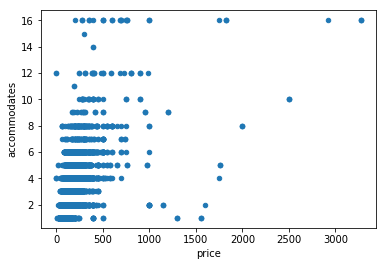

In [29]:
# extract 2018 room price analysis 
# neighbourhood_cleansed_accommodates_price
# plot results
neighbourhood_cleansed_accommodates_price_Williamsburg.plot.scatter('price', 'accommodates')

In [30]:
# williamsburg with 2 rooms only
neighbourhood_cleansed_accommodates_price_Williamsburg = neighbourhood_cleansed_accommodates_price_Williamsburg.loc[neighbourhood_cleansed_accommodates_price['accommodates'] == 2]
neighbourhood_cleansed_accommodates_price_Williamsburg

,neighbourhood_cleansed,accommodates,price,beds,bedrooms,bathrooms,host_response_rate,host_is_superhost
36325,Williamsburg,2,25.0,1.0,1.0,1.0,33.0,0
27203,Williamsburg,2,29.0,1.0,1.0,1.0,0.0,1
76990,Williamsburg,2,29.0,1.0,1.0,1.0,100.0,0
125858,Williamsburg,2,29.0,1.0,1.0,1.0,100.0,0
967,Williamsburg,2,30.0,1.0,1.0,1.0,0.0,1
51027,Williamsburg,2,30.0,1.0,1.0,1.0,100.0,0
101847,Williamsburg,2,30.0,1.0,1.0,1.0,100.0,0
23851,Williamsburg,2,35.0,1.0,1.0,4.0,100.0,0
26785,Williamsburg,2,35.0,1.0,1.0,1.0,0.0,0
73610,Williamsburg,2,35.0,1.0,1.0,4.0,0.0,0


In [31]:
# mean with neighbourhood_cleansed_accommodates_price 
neighbourhood_cleansed_accommodates_price_Williamsburg.mean()

accommodates            2.000000
price                 110.340155
beds                    1.058331
bedrooms                0.958105
bathrooms               1.084918
host_response_rate     41.917660
dtype: float64

In [32]:
neighbourhood_cleansed_accommodates_price.groupby(['neighbourhood_cleansed', 'accommodates']).size().loc['Allerton']

accommodates
1     21
2     32
3     12
4     21
7      3
8      3
10     3
11     3
dtype: int64

In [33]:
neighbourhood_cleansed_accommodates_price[neighbourhood_cleansed_accommodates_price.neighbourhood_cleansed == 'Allerton']

,neighbourhood_cleansed,accommodates,price,beds,bedrooms,bathrooms,host_response_rate,host_is_superhost
141642,Allerton,1,34.0,1.0,1.0,1.0,0.0,0
1344,Allerton,1,35.0,1.0,2.0,1.0,0.0,0
51471,Allerton,1,35.0,1.0,2.0,1.0,60.0,0
102268,Allerton,1,35.0,1.0,2.0,1.0,100.0,0
55783,Allerton,1,42.0,1.0,1.0,1.5,100.0,1
106357,Allerton,1,42.0,1.0,1.0,1.5,100.0,1
55709,Allerton,1,43.0,1.0,1.0,1.0,100.0,1
106424,Allerton,1,43.0,1.0,1.0,1.0,100.0,1
5694,Allerton,1,45.0,1.0,1.0,1.5,100.0,1
5731,Allerton,1,45.0,1.0,1.0,1.0,100.0,1


In [34]:
def findAveragePrice(location, guest):
    print(neighbourhood_cleansed_accommodates_price[(neighbourhood_cleansed_accommodates_price.neighbourhood_cleansed == location) & 
                                                    (neighbourhood_cleansed_accommodates_price.accommodates == guest)])

findAveragePrice('Allerton', 2)

       neighbourhood_cleansed  accommodates  price  beds  bedrooms  bathrooms  \
7319                 Allerton             2   43.0   2.0       1.0        1.0   
57274                Allerton             2   43.0   2.0       1.0        1.0   
107893               Allerton             2   43.0   2.0       1.0        1.0   
42226                Allerton             2   45.0   1.0       1.0        1.0   
91613                Allerton             2   45.0   1.0       1.0        1.0   
138842               Allerton             2   45.0   1.0       1.0        1.0   
99605                Allerton             2   48.0   1.0       1.0        1.0   
145964               Allerton             2   48.0   1.0       1.0        1.0   
29499                Allerton             2   49.0   1.0       1.0        1.0   
79169                Allerton             2   49.0   1.0       1.0        1.0   
127897               Allerton             2   49.0   1.0       1.0        1.0   
97477                Allerto

In [35]:
def findLocationPrice(location):
    return neighbourhood_cleansed_accommodates_price[(neighbourhood_cleansed_accommodates_price.neighbourhood_cleansed == location)]

findLocationPrice('Williamsburg')

,neighbourhood_cleansed,accommodates,price,beds,bedrooms,bathrooms,host_response_rate,host_is_superhost
45003,Williamsburg,1,10.0,1.0,0.0,1.0,0.0,0
94304,Williamsburg,1,10.0,1.0,0.0,1.0,0.0,0
141283,Williamsburg,1,10.0,1.0,0.0,1.0,0.0,0
39867,Williamsburg,1,26.0,1.0,1.0,1.0,100.0,1
89400,Williamsburg,1,26.0,1.0,1.0,1.0,100.0,1
136862,Williamsburg,1,26.0,1.0,1.0,1.0,0.0,1
42781,Williamsburg,1,29.0,1.0,1.0,1.0,0.0,0
92123,Williamsburg,1,29.0,1.0,1.0,1.0,0.0,0
38747,Williamsburg,1,30.0,1.0,1.0,1.0,100.0,0
40043,Williamsburg,1,30.0,1.0,1.0,1.0,0.0,0


temp_array = []
def findPrice(location, guest):
    for i, row in neighbourhood_cleansed_accommodates_price.iterrows():
        if row['neighbourhood_cleansed'] == location and row['accommodates'] == guest:
            #print(row['neighbourhood_cleansed'], row['accommodates'], row['price'])
            temp_array.append[]

findPrice('Allertion', 2)

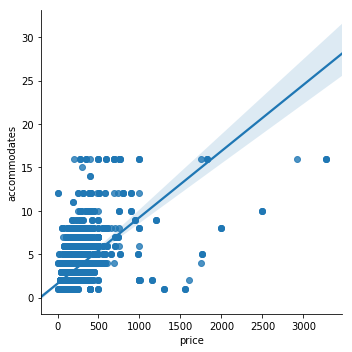

In [36]:
import seaborn as sns

df_graph = findLocationPrice('Williamsburg')
#df_graph.plot.scatter(x = 'price', y ='accommodates', title = 'scatterplot')
sns.lmplot(x='price',y='accommodates',data=df_graph,fit_reg=True)

## Linear Regression

In [37]:
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


df_test = findLocationPrice('Williamsburg')
df_test = df_test.drop(['neighbourhood_cleansed'], axis=1)
df_test

,accommodates,price,beds,bedrooms,bathrooms,host_response_rate,host_is_superhost
45003,1,10.0,1.0,0.0,1.0,0.0,0
94304,1,10.0,1.0,0.0,1.0,0.0,0
141283,1,10.0,1.0,0.0,1.0,0.0,0
39867,1,26.0,1.0,1.0,1.0,100.0,1
89400,1,26.0,1.0,1.0,1.0,100.0,1
136862,1,26.0,1.0,1.0,1.0,0.0,1
42781,1,29.0,1.0,1.0,1.0,0.0,0
92123,1,29.0,1.0,1.0,1.0,0.0,0
38747,1,30.0,1.0,1.0,1.0,100.0,0
40043,1,30.0,1.0,1.0,1.0,0.0,0


In [38]:
reg = linear_model.LinearRegression()
reg.fit(df_test[['accommodates', 'beds', 'bedrooms', 'bathrooms']], df_test.price)
#fit == training a model with the available points

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
reg.coef_

array([ 50.39070388, -22.67245991,  -8.99595851,  69.87380904])

In [40]:
reg.intercept_

-30.219753842387973

In [41]:
reg.predict([[2, 2, 1, 1]])

array([86.09458462])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_test[['accommodates', 'beds', 'bedrooms', 'bedrooms']],
    df_test['price'], test_size = 0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

reg_all.score(X_test, y_test)

0.3494212631648721

In [43]:
#rms = np.sqrt(mean_squared_error(y_test, y_pred))
#print(rms)

In [44]:
df_predictors = df_test[['accommodates', 'beds', 'bedrooms', 'bedrooms']]
df_target_value = df_test[['price']]

In [45]:
df_predictors = sm.add_constant(df_predictors)
est = sm.OLS(df_target_value, 
            df_predictors).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     2273.
Date:                Tue, 14 May 2019   Prob (F-statistic):               0.00
Time:                        16:39:12   Log-Likelihood:                -76419.
No. Observations:               12497   AIC:                         1.528e+05
Df Residuals:                   12493   BIC:                         1.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           29.8824      2.040     14.649   

## Regularization

In [46]:
# Ridge regression
#ridge = Ridge(alpha=0.1, normalize=True)
#ridge.fit(X_train,y_train)
#ridge_pred = ridge.predict(X_test)
#ridge.score(X_test,y_test)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df_test[['accommodates', 'beds', 'bedrooms', 'bedrooms']],
    df_test['price'], test_size = 0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test,y_test)

0.3299537138671209

In [48]:
# Lasso regression
lasso = Lasso()
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test,y_test)

0.34697819913801287

## Random Forest Tree

In [49]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [50]:
df_test

,accommodates,price,beds,bedrooms,bathrooms,host_response_rate,host_is_superhost
45003,1,10.0,1.0,0.0,1.0,0.0,0
94304,1,10.0,1.0,0.0,1.0,0.0,0
141283,1,10.0,1.0,0.0,1.0,0.0,0
39867,1,26.0,1.0,1.0,1.0,100.0,1
89400,1,26.0,1.0,1.0,1.0,100.0,1
136862,1,26.0,1.0,1.0,1.0,0.0,1
42781,1,29.0,1.0,1.0,1.0,0.0,0
92123,1,29.0,1.0,1.0,1.0,0.0,0
38747,1,30.0,1.0,1.0,1.0,100.0,0
40043,1,30.0,1.0,1.0,1.0,0.0,0


In [51]:
#median_reviews_scores_rating = math.floor(df.review_scores_rating.median()) 
#df['review_scores_rating'] = df['review_scores_rating'].fillna(value=median_reviews_scores_rating)

In [52]:
#median_host_total_listings_count = math.floor(df.host_total_listings_count.median()) 
#df['host_total_listings_count'] = df['host_total_listings_count'].fillna(value=median_host_total_listings_count)

In [53]:
df_features = df_test[['accommodates', 'beds', 'bedrooms', 'bathrooms']]
df_target = df_test['price']

In [54]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12497 entries, 45003 to 122968
Data columns (total 4 columns):
accommodates    12497 non-null int64
beds            12497 non-null float64
bedrooms        12497 non-null float64
bathrooms       12497 non-null float64
dtypes: float64(3), int64(1)
memory usage: 808.2 KB


In [55]:
feat_labels = ['accommodates', 'beds', 'bedrooms', 'bathrooms']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.4, random_state=0)

In [57]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('accommodates', 0.33866907057332585)
('beds', 0.24591147725582926)
('bedrooms', 0.1915838316569749)
('bathrooms', 0.2238356205138715)


In [58]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.15)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.15)

In [59]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

accommodates
beds
bedrooms
bathrooms


In [60]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [61]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [62]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

0.09281856371274255

In [63]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

0.09281856371274255

In [64]:
#google example

import sklearn.linear_model as sk
df['price'] = df['price'].astype(int)
df['beds'] = df['beds'].fillna(value=0)
df['bedrooms'] = df['bedrooms'].fillna(value=0)
df['bathrooms'] = df['bathrooms'].fillna(value=0)
predictors = df[['latitude', 'longitude', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'accommodates', 'price']]
predictors.info()

X = df.drop('price', axis=1)
y = df['price']

from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
#rfc_predict = rfc.predict(X_test)